In [ ]:
#5a - Data Loading & Preprocessing

import os
import pandas as pd

# Defining the file path
file_path = "/Users/kudakwashechakanyuka/Downloads/concrete+compressive+strength/Concrete_Data_real.csv"

# Checking if the file exists before loading
if os.path.exists(file_path):
    concrete_df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")

    # Display the first few rows
    print("\nFirst few rows of the dataset:")
    print(concrete_df.head())

    # Identifying the features and target variable
    features = concrete_df.columns[:-1]
    target = concrete_df.columns[-1]

    print("\nIndependent variables (features):")
    print(features)

    print("\nDependent variable (target - Compressive Strength):")
    print(target)

    # Checking for missing values
    missing_values = concrete_df.isnull().sum()
    print("\nMissing values in each column:")
    print(missing_values)

    # Handling missing values
    if missing_values.any():
        concrete_df.fillna(concrete_df.mean(), inplace=True)
        print("\nMissing values have been filled with the mean of each column.")
    else:
        print("\nNo missing values found.")

    # Spliting the dataset
    train_size = int(0.8 * len(concrete_df))
    train_data = concrete_df[:train_size]
    test_data = concrete_df[train_size:]

    print("\nTraining data shape:", train_data.shape)
    print("Testing data shape:", test_data.shape)

    # Displaying the first few rows of training and testing sets
    print("\nFirst few rows of the training dataset:")
    print(train_data.head())

    print("\nFirst few rows of the testing dataset:")
    print(test_data.head())

else:
    print(f"Error: File '{file_path}' not found. Please check the path and try again.")


Dataset loaded successfully!

First few rows of the dataset:
   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.

Mean Squared Error (MSE): 95.9709
R² Score: 0.6276


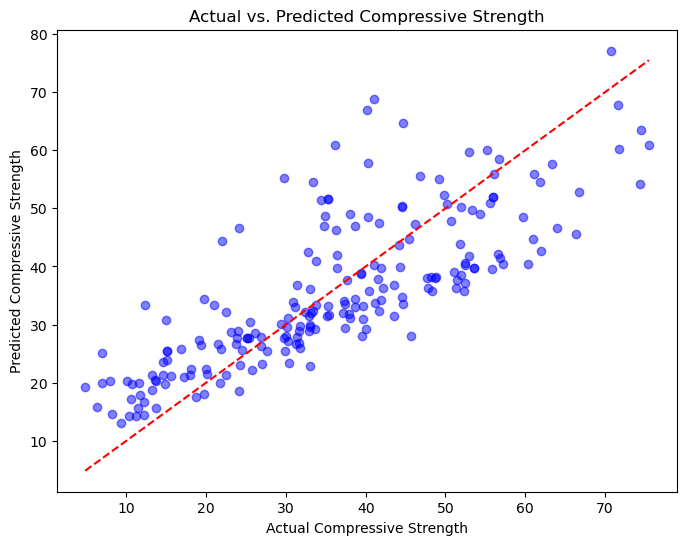

In [ ]:
#5b - Implementing Linear Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
file_path = "/Users/kudakwashechakanyuka/Downloads/concrete+compressive+strength/Concrete_Data_real.csv"
concrete_df = pd.read_csv(file_path)

# Identifying the features (X) and target (y)
X = concrete_df.iloc[:, :-1]  
y = concrete_df.iloc[:, -1]   

# Spliting the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score

# This should show the performance metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plotting the predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Reference line
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Actual vs. Predicted Compressive Strength")
plt.show()



Degree 2:
  Mean Squared Error (MSE): 55.5825
  R² Score: 0.7843

Degree 3:
  Mean Squared Error (MSE): 40.2976
  R² Score: 0.8436

Degree 4:
  Mean Squared Error (MSE): 982.3807
  R² Score: -2.8125



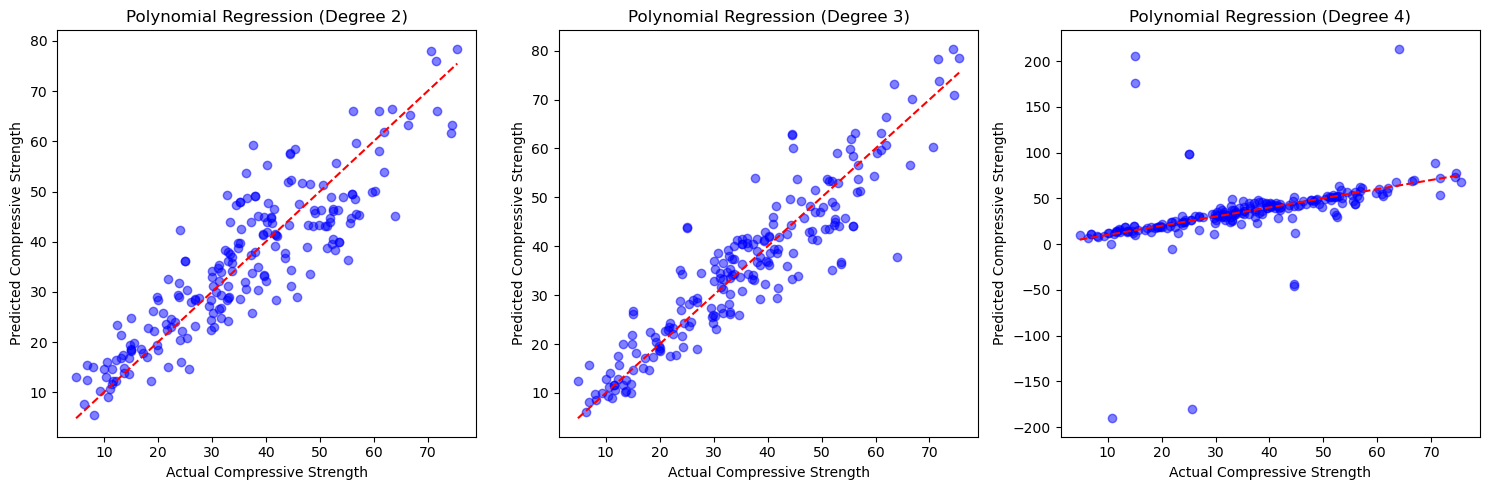

In [ ]:
#5c - Implementing Polynomial Regression (k = 2, 3, 4)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
file_path = "/Users/kudakwashechakanyuka/Downloads/concrete+compressive+strength/Concrete_Data_real.csv"
concrete_df = pd.read_csv(file_path)

# Identifying the features (X) and the target (y)
X = concrete_df.iloc[:, :-1]  
y = concrete_df.iloc[:, -1]   

# Splitting the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training polynomial regression models for k = 2, 3, 4
degrees = [2, 3, 4]
mse_scores = []
r2_scores = []

plt.figure(figsize=(15, 5))  

for i, degree in enumerate(degrees):
    # Transforming features using PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Training linear regression model on transformed features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Making predictions
    y_pred = model.predict(X_test_poly)

    # Evaluating model performance
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R² Score
    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Degree {degree}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  R² Score: {r2:.4f}\n")

    #  Plotting the predicted vs. actual values
    plt.subplot(1, 3, i + 1)
    plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
    plt.xlabel("Actual Compressive Strength")
    plt.ylabel("Predicted Compressive Strength")
    plt.title(f"Polynomial Regression (Degree {degree})")

plt.tight_layout()
plt.show()


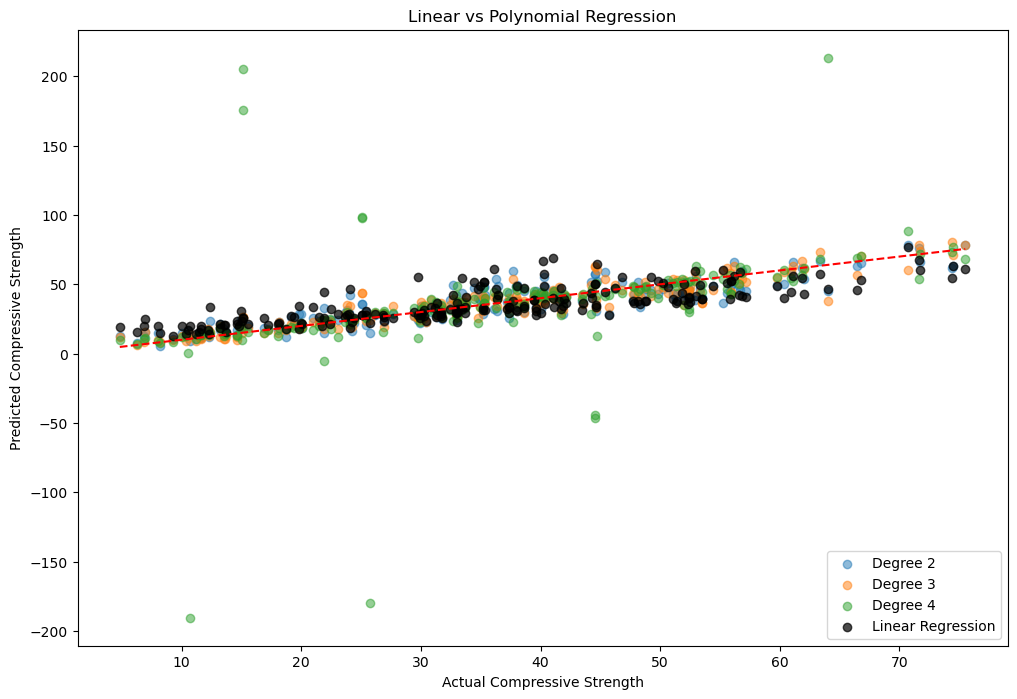

Mean Squared Error (MSE) Comparison:
  Linear: 95.9709
  Degree 2: 55.5825
  Degree 3: 40.2976
  Degree 4: 982.3807

R² Score Comparison:
  Linear: 0.6276
  Degree 2: 0.7843
  Degree 3: 0.8436
  Degree 4: -2.8125


In [ ]:
#5d - Visualizing and Comparing Results

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
file_path = "/Users/kudakwashechakanyuka/Downloads/concrete+compressive+strength/Concrete_Data_real.csv"
concrete_df = pd.read_csv(file_path)

# Identifying the features (X) and target (y)
X = concrete_df.iloc[:, :-1]  
y = concrete_df.iloc[:, -1]   

# Spliting the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Training polynomial regression models (Degrees 2, 3, 4)
degrees = [2, 3, 4]
mse_scores = {"Linear": mean_squared_error(y_test, y_pred_linear)}
r2_scores = {"Linear": r2_score(y_test, y_pred_linear)}
y_preds = {"Linear": y_pred_linear}

plt.figure(figsize=(12, 8))

for degree in degrees:
    # Transforming features for polynomial regression
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Training polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Making predictions
    y_pred_poly = poly_model.predict(X_test_poly)

    # To store MSE and R² Score
    mse_scores[f"Degree {degree}"] = mean_squared_error(y_test, y_pred_poly)
    r2_scores[f"Degree {degree}"] = r2_score(y_test, y_pred_poly)
    y_preds[f"Degree {degree}"] = y_pred_poly

    # Plotting the predictions vs actual values
    plt.scatter(y_test, y_pred_poly, alpha=0.5, label=f"Degree {degree}")

# Plotting linear regression predictions
plt.scatter(y_test, y_pred_linear, color="black", label="Linear Regression", alpha=0.7)

# Adding a reference line or a perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")

plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()

# Comparing the MSE and R² Scores
print("Mean Squared Error (MSE) Comparison:")
for model, mse in mse_scores.items():
    print(f"  {model}: {mse:.4f}")

print("\nR² Score Comparison:")
for model, r2 in r2_scores.items():
    print(f"  {model}: {r2:.4f}")


In [ ]:
# 5e - Bias-Variance Tradeoff Analysis

""" 
Bias-Variance Tradeoff Analysis

The bias-variance tradeoff is important and used in understanding model performance. It also helps to find a balance between models that are too simple (high bias) and models that are too complex (high variance).
Based on our results above, it is much simplier to analyze the behavior of linear and polynomial regression models.

1. Bias-Variance Tradeoff in Our Models

Which Model Has High Bias and Low Variance?
The linear regression model had high bias and low variance. 
This means that the model made strong assumptions about the relationship between variables, leading to underfitting—where the model was too simplistic to capture the true patterns in the data.

The model performed consistently across different datasets, meaning it did not change significantly when trained on different samples (low variance).
However, its predictions were inaccurate because it could not capture the complexity of the data (high bias).

Which Model Has Low Bias but High Variance?
The polynomial regression model with degree 4 had low bias but high variance. 
It learned the training data extremely well, reducing bias significantly, but it also became too sensitive to small fluctuations in the data, leading to overfitting.

The model produced very accurate predictions on the training data (low bias).
However, when tested on unseen data, the accuracy dropped sharply because it was too finely tuned to the training set (high variance).

Which Model Achieves a Balance Between Bias and Variance?
The polynomial regression models with degree 2 or 3 struck a balance between bias and variance.
These models captured more complexity than the linear regression model, reducing bias.
At the same time, they were not overly complex like the degree-4 model, preventing excessive variance.
Their test performance was stable, showing that they could generalize well to new data.

2. Why Do Higher-Degree Polynomials Overfit?
From our results, we observed that increasing the polynomial degree beyond a certain point led to overfitting.
Below are the reasons :
Excessive Complexity:
- Higher-degree polynomials add more parameters, making the model more flexible.
- This flexibility allows the model to fit every detail in the training data, including random noise.
Sensitivity to Small Changes:
- The degree-4 model produced extreme curves, adjusting sharply to small variations in the data.
- This made it highly dependent on the exact dataset it was trained on, meaning even minor differences in new data caused significant changes in predictions.
Poor Generalization:
- While the model fit the training data almost perfectly, its performance on test data declined.
- This is a sign of overfitting—where the model memorizes the training set instead of learning general patterns.

Linear regression (high bias, low variance) underfits the data, missing key patterns.
Degree-4 polynomial regression (low bias, high variance) overfits, leading to poor generalization.
Degree-2 or 3 polynomial regression provides the best tradeoff, balancing complexity and generalization.
For real-world applications, we would likely choose degree 2 or 3 to get the best performance without overfitting.
"""

' \nBias-Variance Tradeoff Analysis\n\nThe bias-variance tradeoff is important and used in understanding model performance. It also helps to find a balance between models that are too simple (high bias) and models that are too complex (high variance).\nBased on our results above, it is much simplier to analyze the behavior of linear and polynomial regression models.\n\n1. Bias-Variance Tradeoff in Our Models\n\nWhich Model Has High Bias and Low Variance?\nThe linear regression model had high bias and low variance. \nThis means that the model made strong assumptions about the relationship between variables, leading to underfitting—where the model was too simplistic to capture the true patterns in the data.\n\nThe model performed consistently across different datasets, meaning it did not change significantly when trained on different samples (low variance).\nHowever, its predictions were inaccurate because it could not capture the complexity of the data (high bias).\n\nWhich Model Has Lo